# Practical example

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [225]:
pd.options.display.max_rows = 999
model = raw_data['Model']
model
modelss = model.value_counts().index.tolist()
models_counts = (model.value_counts())
models_counts = models_counts[models_counts>15]
models = models_counts.index.tolist()
models_drop = [model for model in modelss if model not in models]
print(models_drop, models_counts)

['Grand Scenic', '80', 'Passat B4', 'Golf VI', 'Logan', 'Q5', 'Golf V', 'Highlander', 'Yaris', 'X5 M', '523', 'V 250', 'S 550', 'S 320', 'GL 350', 'L 200', 'X3', 'Golf II', 'G 500', 'ML 320', 'Golf VII', 'Hilux', 'Colt', 'A3', 'Symbol', 'X1', 'Sharan', 'Master', '330', 'Fluence', 'M5', '316', 'GL 320', '325', 'Duster', 'Venza', '740', '328', '735', 'S 400', 'T4 (Transporter) ', '190', 'T6 (Transporter) ', 'Phaeton', 'B 180', 'Clio', 'Carisma', 'ASX', 'S 600', 'FJ Cruiser', 'Viano', 'Bora', 'Sprinter 312', 'S 63 AMG', 'Caravelle', 'Pajero', '200', 'CLS 350', '745', 'Golf Variant', '540', 'G 350', 'GLS 63', 'Sandero', 'Scirocco', 'Vento', 'G 63 AMG', 'Land Cruiser 80', 'B-Class Electric Drive', 'Koleos', 'X6 M', 'A 170', 'TT', 'Passat B8', 'S 140', 'CL 500', 'Q3', 'ML 63 AMG', 'G 55 AMG', 'Golf Plus', 'GLS 500', '118', 'T6 (Transporter)', 'Space Star', 'Z4', 'Tundra', 'Prius', 'Espace', 'Carina', '230', 'Lancer Evolution', 'Amarok', '640', 'GL 450', 'A4 Allroad', 'Grandis', 'R8', 'LT', '

In [161]:
my_data = raw_data
raw_data.describe(include='all')

# data = raw_data.drop(['Model'],axis=1)
# data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Dealing with missing values

In [162]:
my_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [163]:
data_no_mv = my_data.dropna(axis=0)

In [164]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the PDFs

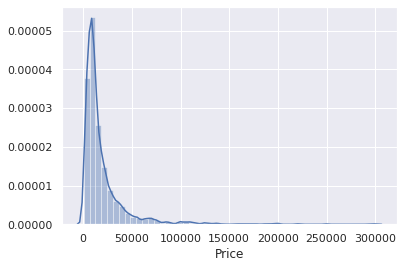

In [165]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [166]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


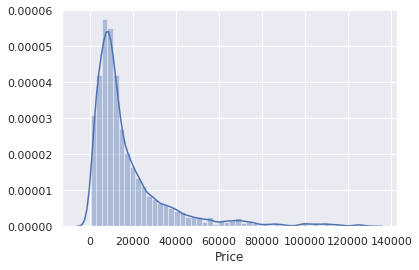

In [167]:
sns.distplot(data_1['Price'])

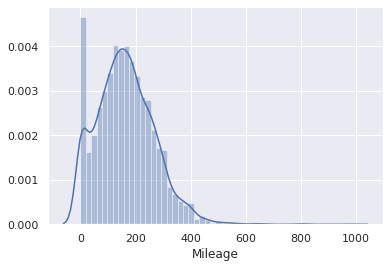

In [168]:
sns.distplot(data_no_mv['Mileage'])

In [169]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

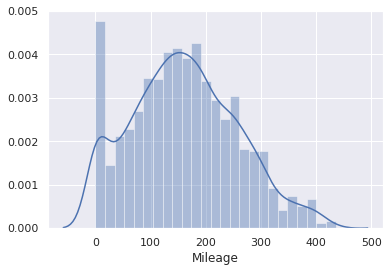

In [170]:
sns.distplot(data_2['Mileage'])

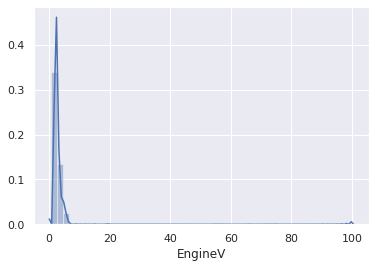

In [171]:
sns.distplot(data_no_mv['EngineV'])

In [172]:
data_3 = data_2[data_2['EngineV']<6.5]

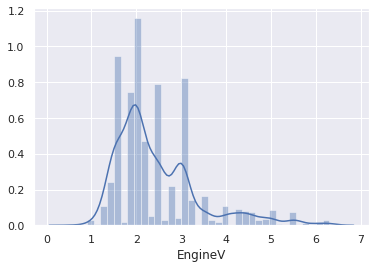

In [173]:
sns.distplot(data_3['EngineV'])

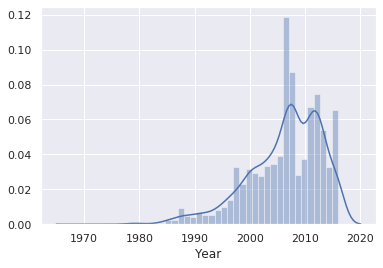

In [174]:
sns.distplot(data_no_mv['Year'])

In [175]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

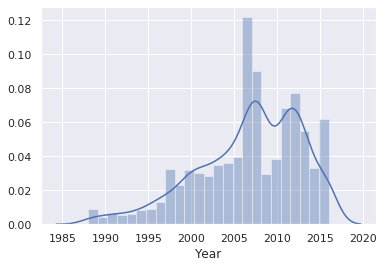

In [176]:
sns.distplot(data_4['Year'])

In [177]:
data_cleaned = data_4.reset_index(drop=True)

In [203]:
data_cleaned.describe(include='all')
data_cleaned['Model'].unique()
if 'Sprinter 212' in data_cleaned.columns:
    print('true')

## Checking the OLS assumptions

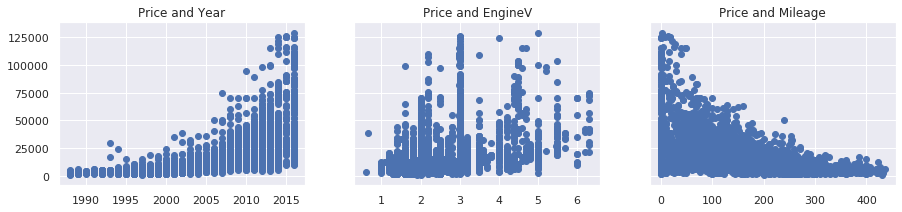

In [179]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

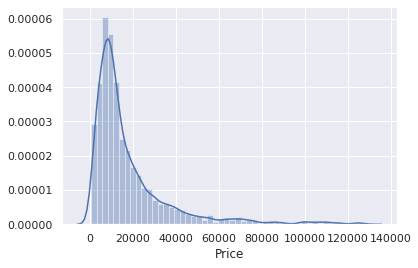

In [180]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [181]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

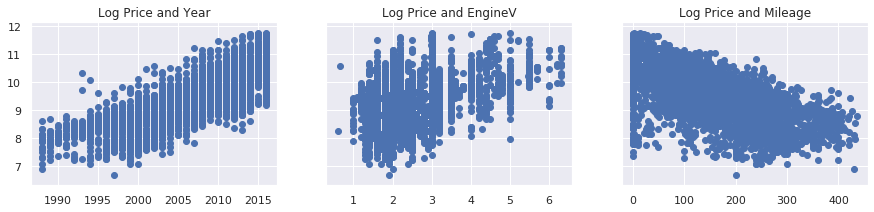

In [182]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [183]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [184]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [186]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [187]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [229]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [230]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Rearrange a bit

In [231]:
data_with_dummies.columns.values
cols = data_with_dummies.columns.values

In [236]:
cols

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_73

In [32]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [266]:
pd.options.display.max_rows = 999
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()
columns = data_preprocessed.columns.tolist()
new_model_drop = [[] for _ in range(len(models_drop))]
for num in range(len(models_drop)):
    if 'Model_'+models_drop[num] in columns:
        new_model_drop[num] = 'Model_'+models_drop[num]
new_model_drop = np.asarray(new_model_drop)
print(new_model_drop,columns)

['Model_Grand Scenic' 'Model_80' 'Model_Passat B4' 'Model_Golf VI'
 'Model_Logan' 'Model_Q5' 'Model_Golf V' 'Model_Highlander' 'Model_Yaris'
 'Model_X5 M' 'Model_523' 'Model_V 250' 'Model_S 550' 'Model_S 320'
 'Model_GL 350' 'Model_L 200' 'Model_X3' 'Model_Golf II' 'Model_G 500'
 'Model_ML 320' 'Model_Golf VII' 'Model_Hilux' 'Model_Colt' 'Model_A3'
 'Model_Symbol' 'Model_X1' 'Model_Sharan' 'Model_Master' 'Model_330'
 'Model_Fluence' 'Model_M5' 'Model_316' 'Model_GL 320' 'Model_325'
 'Model_Duster' 'Model_Venza' 'Model_740' 'Model_328' 'Model_735'
 'Model_S 400' 'Model_T4 (Transporter) ' 'Model_190'
 'Model_T6 (Transporter) ' 'Model_Phaeton' 'Model_B 180' 'Model_Clio'
 'Model_Carisma' 'Model_ASX' 'Model_S 600' 'Model_FJ Cruiser'
 'Model_Viano' 'Model_Bora' 'Model_Sprinter 312' 'Model_S 63 AMG'
 'Model_Caravelle' 'Model_Pajero' 'Model_200' 'Model_CLS 350' 'Model_745'
 'Model_Golf Variant' 'Model_540' 'Model_G 350' list([]) 'Model_Sandero'
 'Model_Scirocco' 'Model_Vento' 'Model_G 63 AMG' 

## Linear regression model


### Declare the inputs and the targets

In [267]:
for model in new_model_drop:
    print(model)
    data_preprocessed = data_preprocessed.drop(model, axis=1)
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)


Model_Grand Scenic
Model_80
Model_Passat B4
Model_Golf VI
Model_Logan
Model_Q5
Model_Golf V
Model_Highlander
Model_Yaris
Model_X5 M
Model_523
Model_V 250
Model_S 550
Model_S 320
Model_GL 350
Model_L 200
Model_X3
Model_Golf II
Model_G 500
Model_ML 320
Model_Golf VII
Model_Hilux
Model_Colt
Model_A3
Model_Symbol
Model_X1
Model_Sharan
Model_Master
Model_330
Model_Fluence
Model_M5
Model_316
Model_GL 320
Model_325
Model_Duster
Model_Venza
Model_740
Model_328
Model_735
Model_S 400
Model_T4 (Transporter) 
Model_190
Model_T6 (Transporter) 
Model_Phaeton
Model_B 180
Model_Clio
Model_Carisma
Model_ASX
Model_S 600
Model_FJ Cruiser
Model_Viano
Model_Bora
Model_Sprinter 312
Model_S 63 AMG
Model_Caravelle
Model_Pajero
Model_200
Model_CLS 350
Model_745
Model_Golf Variant
Model_540
Model_G 350
[]
Model_Sandero
Model_Scirocco
Model_Vento
Model_G 63 AMG
Model_Land Cruiser 80
[]
Model_Koleos
Model_X6 M
Model_A 170
Model_TT
Model_Passat B8
Model_S 140
Model_CL 500
Model_Q3
Model_ML 63 AMG
Model_G 55 AMG
Mo

### Scale the data

In [268]:
data_preprocessed.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes', 'Model_100', 'Model_318', 'Model_320', 'Model_520',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_730',
       'Model_750', 'Model_A4', 'Model_A5', 'Model_A6', 'Model_A6 Allroad',
       'Model_A8', 'Model_Auris', 'Model_Avensis', 'Model_C-Class',
       'Model_Caddy', 'Model_Camry', 'Model_Corolla', 'Model_E-Class',
       'Model_GLE-Class', 'Model_GLS 350', 'Model_Galant', 'Model_Golf III',
       'Model_Golf IV', 'Model_Jetta', 'Model_Kangoo', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer X', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 200', 'Model_Land Cruiser Prado', 'Model_ML 350',
       'Model_Megane', 'Model_Multivan',

In [269]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [270]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [271]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [272]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
from sklearn.feature_selection import f_regression
f_regression(inputs,targets)
p_values = f_regression(inputs,targets)[1]
p_values
reg_summary = pd.DataFrame(data = inputs.columns.values, columns=['Features'])
reg_summary ['Coefficients'] = reg.coef_
reg_summary ['p-values'] = p_values.round(3)
reg_summary = reg_summary[17:]
model_all_cols = reg_summary['Features'].tolist()
reg_summary = reg_summary[np.abs(reg_summary['Coefficients'])<1]
reg_summary

,Features,Coefficients,p-values
19,Model_116,0.036697,0.916
20,Model_118,0.037224,0.999
21,Model_120,-0.017441,0.152
23,Model_190,0.015747,0.002
24,Model_200,0.018166,0.008
...,...,...,...
301,Model_X5 M,0.079071,0.000
302,Model_X6,0.171692,0.000
303,Model_X6 M,0.056534,0.001
305,Model_Z3,0.013615,0.305


In [97]:
model_cols = reg_summary['Features']
model_cols = model_cols.tolist()
print(len(model_cols), len(model_all_cols))
model_remove = [remove for remove in model_all_cols if remove not in model_cols]
print((model_remove))
# data_preprocessed = data_preprocessed.drop(np.asarray(model_remove),axis=1)
data_preprocessed

132 290
['Model_100', 'Model_11', 'Model_19', 'Model_25', 'Model_323', 'Model_335', 'Model_4Runner', 'Model_524', 'Model_545', 'Model_760', 'Model_80', 'Model_9', 'Model_90', 'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5', 'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8', 'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon', 'Model_Avensis', 'Model_Aygo', 'Model_Beetle', 'Model_Bora', 'Model_CLA-Class', 'Model_CLK 230', 'Model_CLK 430', 'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle', 'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio', 'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso', 'Model_Cross Touran', 'Model_Dokker', 'Model_Duster', 'Model_Eclipse', 'Model_Eos', 'Model_Espace', 'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner', 'Model_GL 550', 'Model_Galant', 'Model_Golf GTI', 'Model_Golf II', 'Model_Golf III', 'Model_Golf IV', 'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI', 'Model_Golf VII', 'Model_Golf Varian

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Viano,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Z3,Model_Z4
0,277,2.0,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3863,35,1.6,9.792556,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3864,9,3.0,11.736069,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3865,1,3.5,8.779557,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
x_train

array([[ 0.25577519, -1.106607  , -0.43865069, ..., -0.06027879,
        -0.01608307, -0.03598147],
       [-0.86322675, -1.00125996, -0.43865069, ..., -0.06027879,
        -0.01608307, -0.03598147],
       [-0.4344503 , -0.47452478, -0.43865069, ..., -0.06027879,
        -0.01608307, -0.03598147],
       ...,
       [ 0.64271979,  3.21262147, -0.43865069, ..., -0.06027879,
        -0.01608307, -0.03598147],
       [ 1.24928159,  0.05221039, -0.43865069, ..., -0.06027879,
        -0.01608307, -0.03598147],
       [-0.58086177, -0.47452478, -0.43865069, ..., -0.06027879,
        -0.01608307, -0.03598147]])

In [273]:
y_hat = reg.predict(x_train)

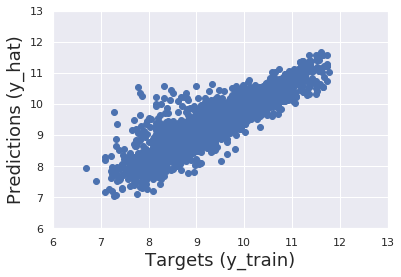

In [274]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

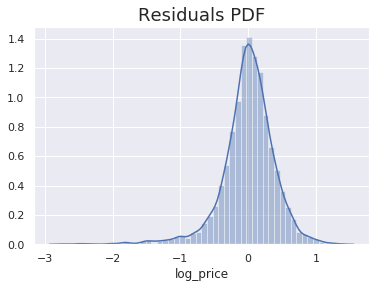

In [275]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [276]:
reg.score(x_train,y_train)

0.7938105834900158

### Finding the weights and bias

In [277]:
reg.intercept_

9.416367988169082

In [278]:
reg.coef_

array([-4.06092790e-01,  1.46709952e-01, -5.76544192e-03,  5.91783150e-03,
       -1.52646185e-01, -2.39686809e-01, -1.06324172e-01, -1.46530934e-01,
       -1.33321226e-01, -7.98970791e-02, -2.03774967e-01, -1.29365182e-01,
       -9.46789720e-02, -1.11784655e-01, -3.12933438e-02, -1.39831349e-01,
        3.19352533e-01, -4.35854090e-02, -2.40112081e-02, -5.95488544e-03,
        2.54946527e-02, -4.33922170e-02, -4.79058186e-03, -1.56231515e-02,
        1.53679668e-02,  6.18286809e-03,  2.73347218e-02, -2.16327382e-02,
        2.38425531e-02, -2.08488966e-02,  3.10087000e-05,  9.82254357e-03,
        4.74089241e-03,  1.16554495e-02, -6.77402895e-04, -5.62133441e-02,
        3.06194600e-02, -1.51683665e-02, -1.16649181e-02,  2.34106316e-02,
        3.62220364e-02, -2.85413814e-02, -4.27017267e-02, -1.08510741e-02,
        2.39682305e-03, -6.09138020e-02,  2.15632402e-02, -9.81291397e-03,
        2.41362855e-03,  7.87599946e-03,  4.44841893e-02,  2.98615927e-02,
       -1.57628321e-02,  

In [279]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.406093
1,EngineV,0.146710
2,Brand_BMW,-0.005765
3,Brand_Mercedes-Benz,0.005918
4,Brand_Mitsubishi,-0.152646
5,Brand_Renault,-0.239687
6,Brand_Toyota,-0.106324
7,Brand_Volkswagen,-0.146531
8,Body_hatch,-0.133321
9,Body_other,-0.079897


In [280]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [281]:
y_hat_test = reg.predict(x_test)

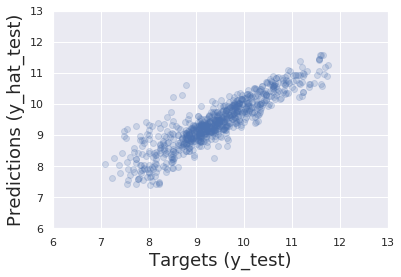

In [282]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [283]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10627.424712
1,4099.846973
2,6906.361770
3,7200.689734
4,11378.639866


In [284]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10627.424712,NaN
1,4099.846973,7900.00
2,6906.361770,NaN
3,7200.689734,NaN
4,11378.639866,NaN
5,17421.989321,14200.00
6,21344.421286,NaN
7,21321.125583,NaN
8,13031.017842,11950.00
9,40720.752234,NaN


In [285]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [286]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10627.424712,2300.00
1,4099.846973,2800.00
2,6906.361770,2500.00
3,7200.689734,6400.00
4,11378.639866,9150.00
5,17421.989321,20000.00
6,21344.421286,38888.00
7,21321.125583,16999.00
8,13031.017842,12500.00
9,40720.752234,41000.00


In [287]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [288]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10627.424712,2300.00,-8327.424712,362.061944
1,4099.846973,2800.00,-1299.846973,46.423106
2,6906.361770,2500.00,-4406.361770,176.254471
3,7200.689734,6400.00,-800.689734,12.510777
4,11378.639866,9150.00,-2228.639866,24.356720
5,17421.989321,20000.00,2578.010679,12.890053
6,21344.421286,38888.00,17543.578714,45.113091
7,21321.125583,16999.00,-4322.125583,25.425764
8,13031.017842,12500.00,-531.017842,4.248143
9,40720.752234,41000.00,279.247766,0.681092


In [289]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16448.603408,18165.817106,1717.213698,33.277527
std,14945.490970,19967.858908,9426.828338,51.832906
min,1606.727822,1200.000000,-33937.679652,0.078063
25%,7459.838542,6900.000000,-2121.796836,9.996536
50%,11271.803862,11600.000000,229.532439,20.990124
75%,20434.720684,20500.000000,2556.820424,36.058847
max,107444.885771,126000.000000,72754.382012,522.118148


In [290]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
277,15011.71,15000.00,-11.71,0.08
692,6788.75,6799.00,10.25,0.15
155,2494.27,2499.00,4.73,0.19
89,12865.92,12900.00,34.08,0.26
328,14243.96,14200.00,-43.96,0.31
762,12944.12,12999.00,54.88,0.42
137,107444.89,107999.00,554.11,0.51
769,29346.08,29500.00,153.92,0.52
274,6943.32,6900.00,-43.32,0.63
115,8744.52,8800.00,55.48,0.63
